# COMP5318 - Machine Learning and Data Mining

## Tutorial 3 - Linear Regression and Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score,train_test_split
%matplotlib inline

## Recap: **Regression vs Classification**

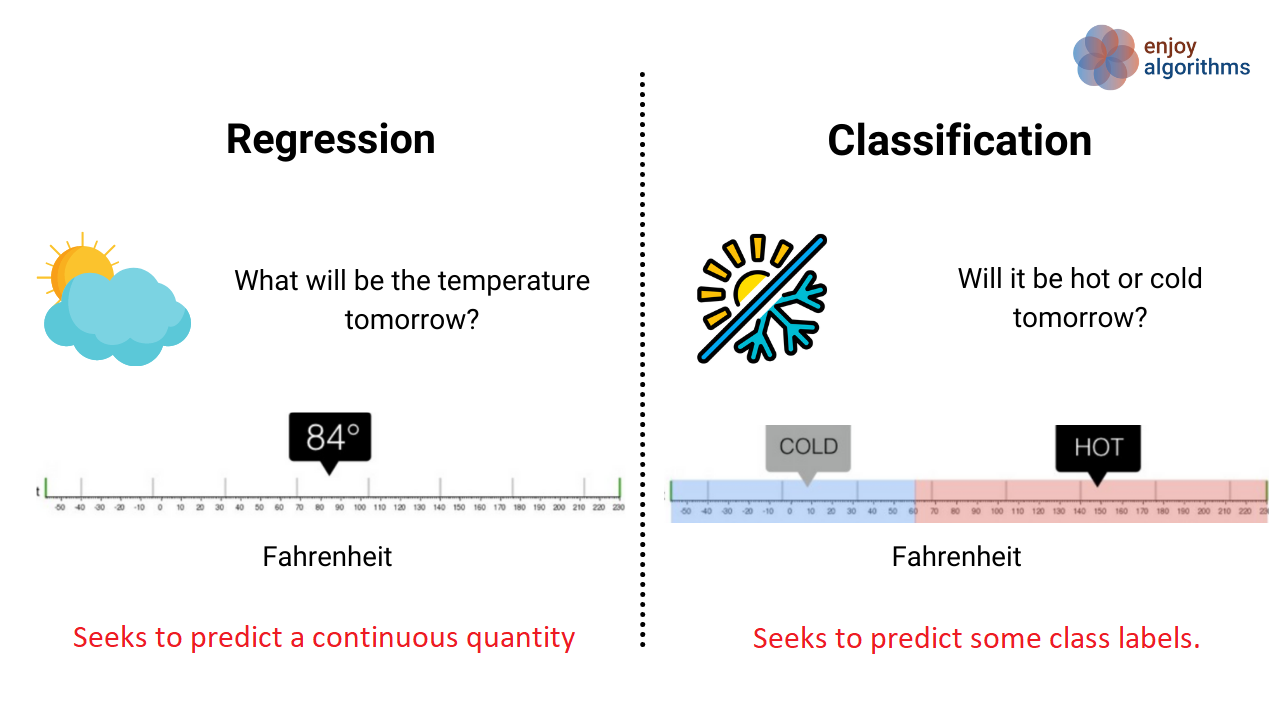

## 1. Linear Regression

### 1.1 Data description

**House Prices dataset**:\
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**Dataset files:**
- **train.csv** - the training set
- **test.csv** - the test set
- **data_description.txt** - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here

**Data fields:**

Here's a brief version of what you'll find in the data description file.

| Feature        | Description                                          |
|----------------|------------------------------------------------------|
| SalePrice      | The property's sale price in dollars. This is the target variable that you're trying to predict. |
| LotFrontage    | Linear feet of street connected to property          |
| LotArea        | Lot size in square feet                              |
| Street         | Type of road access                                  |
| Alley          | Type of alley access                                 |
| LotShape       | General shape of property                            |
| TotalBsmtSF    | Total square feet of basement area                   |
| GrLivArea      | Above grade (ground) living area square feet         |
| Kitchen        | Number of kitchens                                   |
| KitchenQual    | Kitchen quality                                      |
| TotRmsAbvGrd   | Total rooms above grade (does not include bathrooms) |
| SaleType       | Type of sale                                         |
| SaleCondition  | Condition of sale                                    |
| ...            | ...                                                  |

Load training data and testing data to dataframe pandas

In [ ]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# train = pd.read_csv("/content/drive/MyDrive/w3/data/train.csv")
# test = pd.read_csv("/content/drive/MyDrive/w3/data/test.csv")

Mounted at /content/drive


In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 1. 2. Feature Extraction

####  1.2.1. Extract all features using for predict price

In [ ]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [ ]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


Get dataframe info

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

Check if there are any missing values

In [ ]:
all_data.isna().sum()

,0
MSSubClass,0
MSZoning,4
LotFrontage,486
LotArea,0
Street,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,1


Analyze the distribution of the sale prices

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'log(price + 1)'}>]], dtype=object)

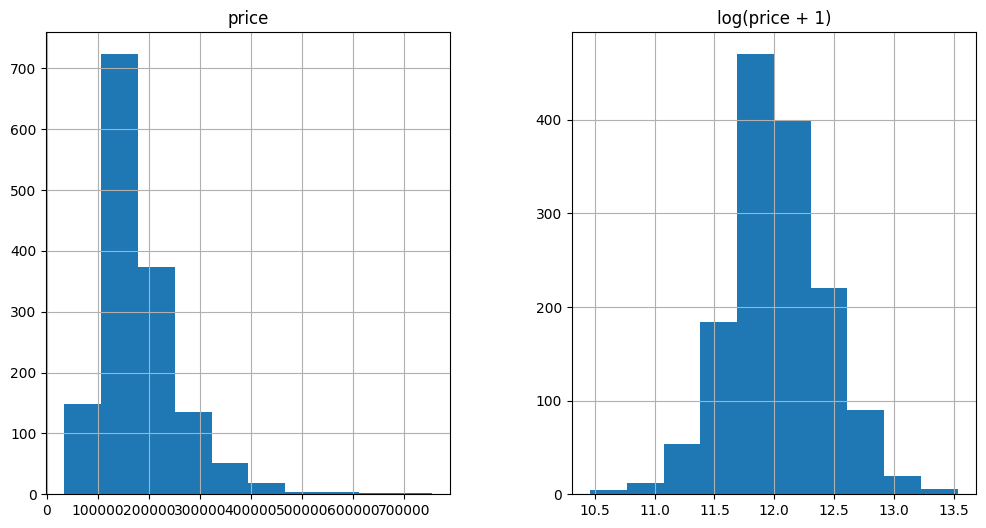

In [ ]:
# Setting the Figure Size
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
# Extracting SalePrice and its log transformation
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
# Plotting Histograms
prices.hist()

**Left Histogram (Original Prices)**
- Right-skewed $→$ most of the data points fall on the lower end of the price range
- The data not "normal" (i.e., not symmetrically distributed around the mean)
- Problem for Linear Regression: may lead to poor model performance, especially in predicting values at the tails of the distribution.

**Right Histogram (Log Transformation)**
- Looks more like a bell shape (normal distribution).
- Reducing the skewness by bringing the larger values closer together and stretching out the smaller values.
- Benefit for Linear Regression: can stabilize variance and make more accurate predictions.

#### Why `log(feature + 1)`?

- Handling zero vales (log(0) is undefined)
- Avoid negative infinity

#### 1.2.2 Data preprocessing:

- First, transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal
- Create Dummy variables for the categorical features    
- Replace the numeric missing values (NaN's) with the mean of their respective columns

##### Transform the skewed numeric features

In [ ]:
# Log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])
test["SalePrice"] = np.log1p(test["SalePrice"])

In [ ]:
# Log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

In [ ]:
# Compute the skewness of each numeric feature
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats

,0
MSSubClass,1.406210
LotFrontage,2.160866
LotArea,12.195142
OverallQual,0.216721
OverallCond,0.692355
YearBuilt,-0.612831
YearRemodAdd,-0.503044
MasVnrArea,2.666326
BsmtFinSF1,1.683771
BsmtFinSF2,4.250888


In [ ]:
# Filter out the features (columns) whose skewness is greater than 0.75
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

In [ ]:
skewed_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [ ]:
# Apply log transformation for features have skewed_feats > 0.75
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2008,WD,Normal
1,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,5,2007,WD,Normal
2,4.110874,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,9,2008,WD,Normal
3,4.262680,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml
4,4.110874,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,12,2008,WD,Normal


##### Handle categorical features and missing values

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

<img src="https://www.sharpsightlabs.com/wp-content/uploads/2022/04/pandas-getdummies_simple-visual-example.png" width=500>

In [ ]:
# Get dummy and fill NA's with the mean of the column:
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,False,False,False,True,False,False,False,False,True,False
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,False,False,False,True,False,False,False,False,True,False
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,False,False,False,True,False,False,False,False,True,False
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,False,False,False,True,True,False,False,False,False,False
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
# Separate training and testing data:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y_train = train.SalePrice
y_test = test.SalePrice

Visualize the relationship between some input features and the price

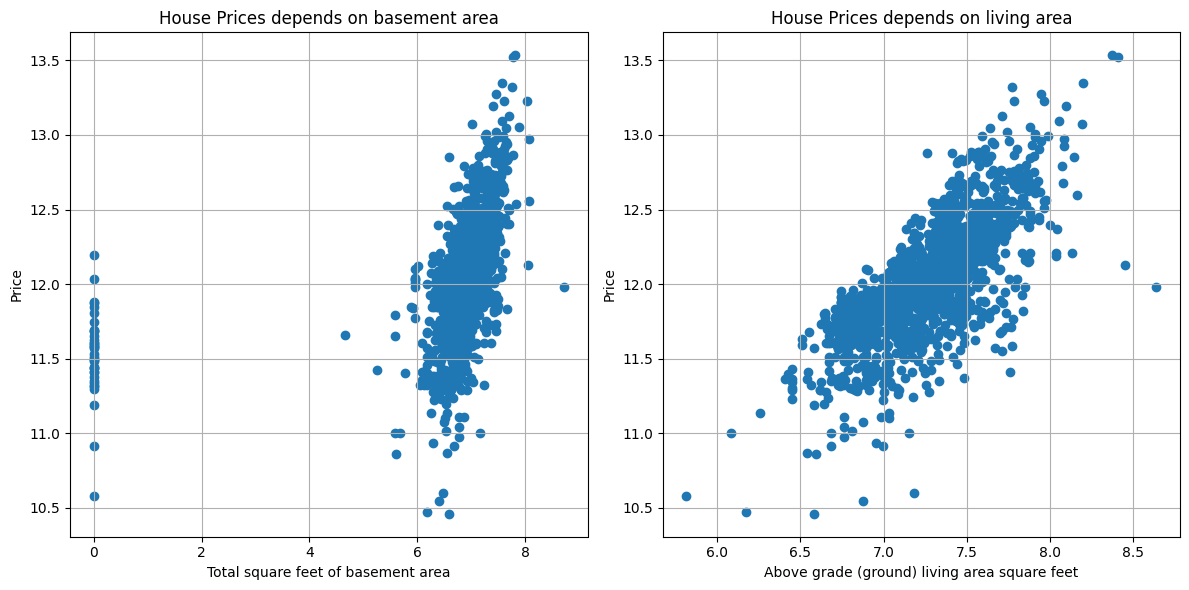

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs = axs.flatten()
axs[0].scatter(X_train.TotalBsmtSF, y_train)
axs[0].set(xlabel='Total square feet of basement area', ylabel='Price',title='House Prices depends on basement area')
axs[0].grid()

axs[1].scatter(X_train.GrLivArea, y_train)
axs[1].set(xlabel='Above grade (ground) living area square feet', ylabel='Price',title='House Prices depends on living area')
axs[1].grid()

fig.tight_layout()
fig.show()

In [ ]:
# Made a prediction based on Living Area Feature

In [ ]:
X_Train = X_train.GrLivArea.to_numpy().reshape(-1,1)
X_Test = X_test.GrLivArea.to_numpy().reshape(-1,1)
y_Train = y_train.to_numpy().reshape(-1,1)
y_Test = y_test.to_numpy().reshape(-1,1)

In [ ]:
X_Train.shape, X_Test.shape

((1460, 1), (1459, 1))

In [ ]:
y_Train.shape, y_Test.shape

((1460, 1), (1459, 1))

### 1. 3. Linear Regression model

<img src="https://cdn-images-1.readmedium.com/v2/resize:fit:800/1*-y7VmmWRh2SpqHqxLYHSBA.png" width=600>

Linear model: $$y = Xw$$

where:
- $y$ is the vector of observed values of the dependent variable.
- $X$ is the matrix of input features, typically each column represents a different feature and each row represents a data sample.
- $w$ is the vector of weights or coefficients assigned to each feature. These weights determine how much each feature contributes to the prediction.

The goal in Linear Regression is to find the best set of weights $w$ that minimizes the difference between the predicted values and the actual observed values.

**Objective**: Minimize Mean Squares Regression

 $$min_w ||y - Xw||_2^2 + \lambda ||w||_2^2 $$

where $\lambda$ is a regularization parameter ( $\lambda = 0$ $→$ Least Square Regression,  $\lambda > 0$ $→$ Ridge Regression)

#### Q: Why do we need regularization?

<img src="https://i0.wp.com/thaddeus-segura.com/wp-content/uploads/2020/09/bias_var.png?resize=768%2C482&ssl=1" width=500>

<img src="https://i0.wp.com/thaddeus-segura.com/wp-content/uploads/2020/09/bias-variance-tradeoff.png?w=438&ssl=1" width=500>

$\rightarrow$ **Model with high bias** pays very little attention to the training data and oversimplifies the model.

$\rightarrow$ **Model with high variance** pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before.

The goal of regularization is to improve the overall fit by **increasing “bias” to reduce “variance”**, by adding a penalty that scales with model complexity.

<img src="https://media.licdn.com/dms/image/D5622AQEiS5fQieqOmA/feedshare-shrink_2048_1536/0/1706780315484?e=2147483647&v=beta&t=N3vlu6pbKFRfuhJgoL8X4qMMYcua4iX87oRNBFcMT_A" width="600">

#### 1.3.1. Closed form solution:
* Closed form solution: $w = (X^TX + \lambda I)^{-1}X^Ty$

In [ ]:
import matplotlib.pylab as pl
%matplotlib inline
#
#w_0 = model_ridge.intercept_
#    w_1 = model_ridge.coef_
def plot(w_0, w_1, str_label):
    x0 = np.linspace(5.5, 9, 10, endpoint=True).reshape(-1,1)
    y0 = w_0 + x0.dot(w_1)
    plt.plot(x0, y0, label = str_label, color = 'r')
    #Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...
    pl.scatter(X_Train, y_Train, marker='.', label = 'Training samples')
    pl.xlabel('Living Area')
    pl.ylabel('Price')
    pl.legend(loc='lower right')
    plt.title('Linear Problems')
    pl.grid()
    pl.show()

In [ ]:
# Add an extra columns of ones
one = np.ones((X_train.shape[0],1))
xTrainbar = np.concatenate((one, X_Train.reshape(-1, 1)), axis = 1)
xTrainbar

array([[1.        , 7.44483327],
       [1.        , 7.14124512],
       [1.        , 7.48829352],
       ...,
       [1.        , 7.75833347],
       [1.        , 6.98378997],
       [1.        , 7.13648321]])

##### Q: Why do we need to add an extra columns of ones

The feature maxtrix includes an extra column of ones to accommodate the bias term $w_0$ along with the features.

$$
y = \begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1p} \\
1 & x_{21} & x_{22} & \dots & x_{2p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \dots & x_{np}
\end{bmatrix}
\begin{bmatrix}
w_0 \\
w_1 \\
\vdots \\
w_p
\end{bmatrix}
=
\begin{bmatrix}
w_0 + w_1 x_{11} + w_2 x_{12} + \dots + w_p x_{1p} \\
w_0 + w_1 x_{21} + w_2 x_{22} + \dots + w_p x_{2p} \\
\vdots \\
w_0 + w_1 x_{n1} + w_2 x_{n2} + \dots + w_p x_{np}
\end{bmatrix}
$$

##### Solving closed formed solution

In [ ]:
Lambda = 0.1
A = np.dot(xTrainbar.T, xTrainbar) #+ Lambda
A_reg =  A + Lambda* np.identity(len(A))
b = np.dot(xTrainbar.T, y_Train)
wCF = np.dot(np.linalg.pinv(A), b)
print("Closed form Solution:",wCF)

Closed form Solution: [[5.66281854]
 [0.87517762]]


In [ ]:
xTrainbar.shape

(1460, 2)

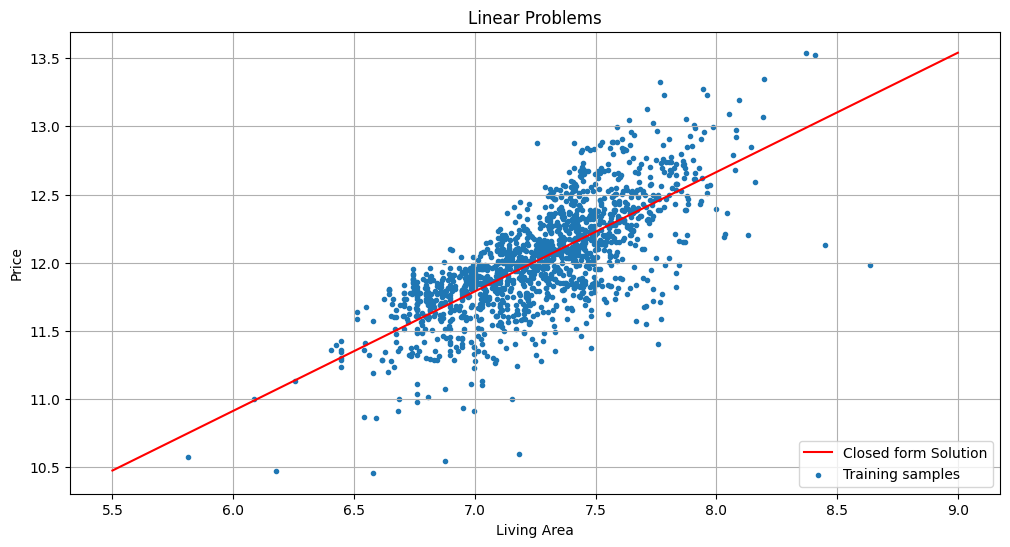

In [ ]:
plot(wCF[0], wCF[1],"Closed form Solution")

#### 1.3.2 Finding solution using Gradient Descent:
* Initialize $w =  w^{(0)}$ randomly:
* Choose learning rate $ \eta> 0$
*  Loop until convergence:

    Compute Gradient: $\nabla mse(w) = \frac{1}{N}(X^T(Xw-y) + \lambda * w)$
    
    Update parameters: $w^{t+1} = w^t - \eta * \nabla mse(w)$

<img src="https://miro.medium.com/max/2400/1*gkl-HRUK35WejSqimAja1w.gif" width=600>

<img src="https://editor.analyticsvidhya.com/uploads/58182variations_comparison.png" width=500>

| **Method**         | **Description**                                       | **Advantages**                         | **Disadvantages**                  |
|--------------------|-------------------------------------------------------|----------------------------------------|------------------------------------|
| **Gradient Descent** | Computes full dataset gradient.                      | Global convergence for convex.         | Slow; struggles with local minima.  |
| **Stochastic GD (SGD)** | Updates from single samples/batches.                | Fast; can escape minima.               | Noisy, needs careful tuning.       |
| **Mini-batch GD**  | Uses data subsets for updates.                        | Faster than GD, less noise than SGD.        | Needs batch size and rate tuning.  |
| **Momentum**       | Accelerates SGD using past updates.                   | Quickens convergence; less oscillation. | Can overshoot; needs tuning.       |
| **AdaGrad**        | Adapts rates by parameter frequency.                  | Auto-adjusts rates; ideal for sparse.  | Rate can shrink excessively.       |
| **RMSprop**        | Modifies AdaGrad to reduce rate decay.                | Mitigates rapid rate decay.            | Requires hyperparameter tuning.    |
| **Adam**           | Integrates Momentum and RMSprop features.             | Highly effective; less tuning.         | More computationally intensive.    |


In [ ]:
# get all sample for each interation
def gradient_descent(x, y, w, iterations, eta, lamb):
    past_loss = []
    past_w = [w]
    n = y.size
    for i in range(iterations):
        prediction = np.dot(x, w)
        error = prediction - y
        # Average (or equivalently, sum) the losses on the training set
        loss = 1/(2*n) * np.dot(error.T, error)
        past_loss.append(loss)
        GradRmse = np.dot(x.T, error) + lamb*w
        w = w - (eta * (1/n) * GradRmse)
        past_w.append(w)

    return past_w, past_loss

[[5.97590118]
 [0.83219035]]


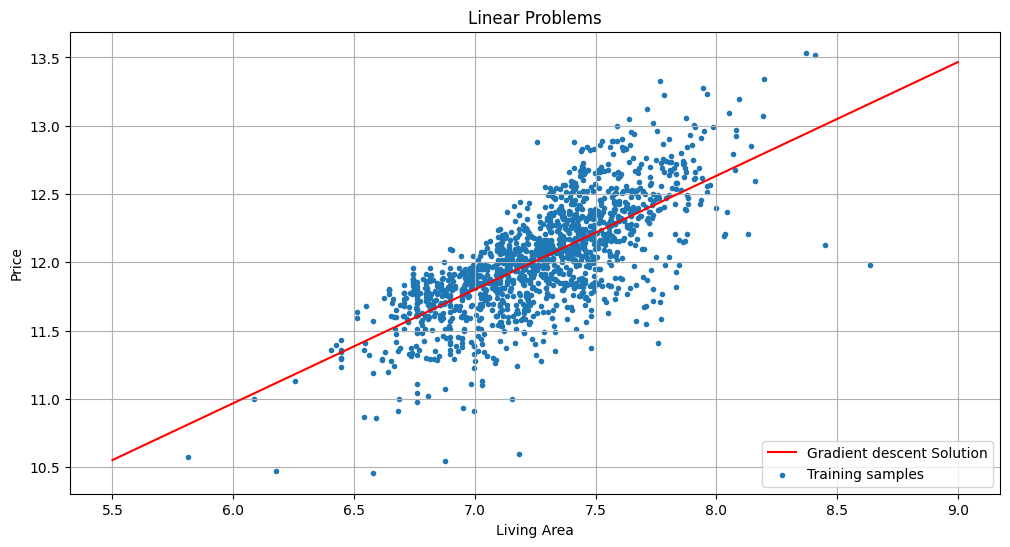

In [ ]:
eta = 0.01 #Step size
iterations = 100 #No. of iterations
w_init = np.array([6, 1]).reshape(-1,1)
(wGD, pastLoss) = gradient_descent(xTrainbar, y_Train, w_init, iterations, eta, Lambda)
print(wGD[-1])
plot(wGD[-1][0], wGD[-1][1],"Gradient descent Solution")

##### Task

In [ ]:
# Todo: Implemenation for SGD, Mini-batch Sgd

###### Answer

In [ ]:
#Solution: Mini-batch Sgd

# helper function: create a list containing mini_batches
def create_mini_batch(X, y, batch_size):
    mini_batches = []
    all_data = np.hstack((X, y))
    np.random.shuffle(all_data)
    n = y.size
    n_minibatches = n // batch_size
    i = 0

    for i in range(n_minibatches + 1):
        mini_batch = all_data[i * batch_size:(i + 1)*batch_size, :]
        X_mini_batch = mini_batch[:,:-1]
        Y_mini_batch = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini_batch, Y_mini_batch))

    if all_data.shape[0] % batch_size != 0:
        mini_batch = all_data[i * batch_size: n]
        X_mini_batch = mini_batch[:,:-1]
        Y_mini_batch = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini_batch, Y_mini_batch))
    return mini_batches

def mini_batch_gd(X, y, w, iterations, eta, lamb, batch_size):
    #eta: step size/learning rate, lamb: regularization
    past_loss = []
    past_w = [w]
    n = batch_size
    for i in range(iterations):
        mini_batches = create_mini_batch(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            prediction = np.dot(X_mini, w)
            error = prediction - y_mini
            loss = 1/(2*batch_size) * np.dot(error.T, error) + 0.5*lamb/batch_size * np.sum(w*w)
            past_loss.append(loss)
            grad = np.dot(X_mini.T, error) + lamb*w
            w = w - (eta * (1/n) * grad)
            past_w.append(w)
    return past_w, past_loss

In [ ]:
# Mini_batch gradient descent
eta = 0.01 #Step size
iterations = 100 #No. of iterations
w_init = np.array([6, 1]).reshape(-1,1)
batch_size = 32
(wGD, pastLoss) = mini_batch_gd(xTrainbar, y_Train, w_init, iterations, eta, Lambda, batch_size)
print(wGD[-1])

[[5.19996369]
 [0.94362418]]


In [ ]:
# Stochastic gradient descent
eta = 0.00001 #Step size
iterations = 100 #No. of iterations
w_init = np.array([6, 1]).reshape(-1,1)
batch_size = 1
(wGD, pastLoss) = mini_batch_gd(xTrainbar, y_Train, w_init, iterations, eta, Lambda, batch_size)
print(wGD[-1])

[[5.19464367]
 [0.93647578]]


#### 1.3.2 Finding solution using sklearn:

{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
[5.66674083] [[0.874638]]


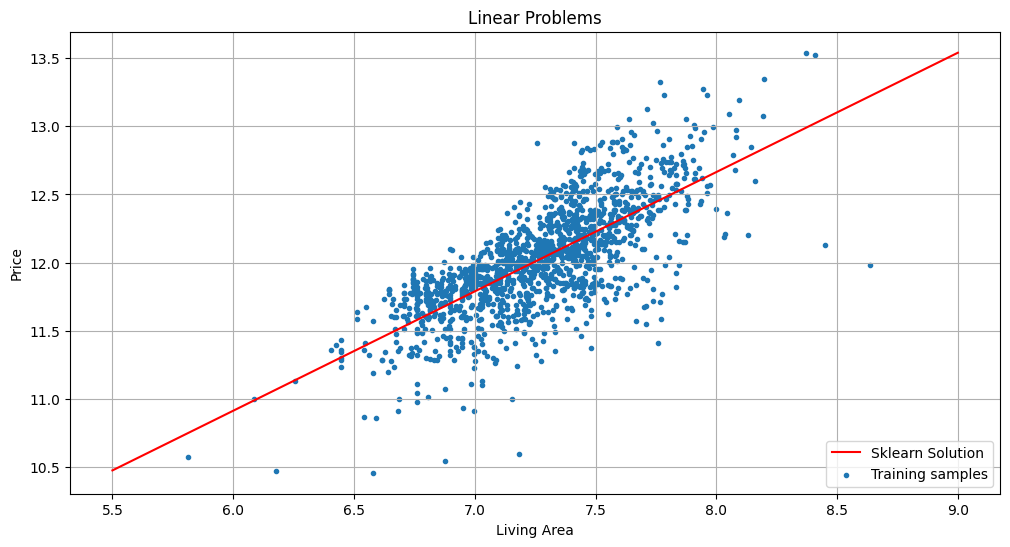

In [ ]:
model_ridge = Ridge(alpha = Lambda)
model_ridge.fit(X_Train, y_Train)
print(model_ridge.get_params())
print(model_ridge.intercept_,model_ridge.coef_)
plot(model_ridge.intercept_, model_ridge.coef_,"Sklearn Solution")

#### 1.4. Evaluation on test dataset

In [ ]:
# Todo: Evaluate MSE on test data.

###### Answer

In [ ]:
def predict(w, X):
    """
    predict output of each row of X
    X: a numpy array of shape (N, d)
    threshold: a threshold between 0 and 1
    return a 1d numpy array, each element is 0 or 1
    """
    res = np.zeros(X.shape[0])
    res = np.dot(X, w)
    return res

In [ ]:
# bias trick
one = np.ones((X_Test.shape[0],1))
xTestbar = np.concatenate((one, X_Test.reshape(-1, 1)), axis = 1)


# training model
y_pred= predict(wGD[-1], xTestbar)

# evaluate
from sklearn.metrics import mean_squared_error
mean_squared_error(y_Test,y_pred)

0.057157263430807924

## 2. Logistic Regression

Logistic regression is used for classification tasks. Despite its name, logistic regression is a classification algorithm and should not be confused with linear regression.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*lnWfrrvR8qkANHombhQMTQ.png" width=600>

Unlike linear regression which predicts continuous values, logistic regression is designed to predict categorical outcomes — typically two classes denoted as 0 and 1.

The core idea behind logistic regression is to estimate probabilities using a **logistic ($\sigma$) function**, which outputs values between 0 and 1. This function is defined as:

$$P(Y=1 \mid X) = \frac{1}{1 + e^{-(w \cdot X)}}$$


<img src="https://images.prismic.io/encord/aa04a3ed-9ce1-44bb-8bea-45ad9ac7b322_Logistic+Regression+in+Machine+Learning+_+Encord.png?auto=compress,format" width=400>

#### Generate synthetic data belonged to 2 classes

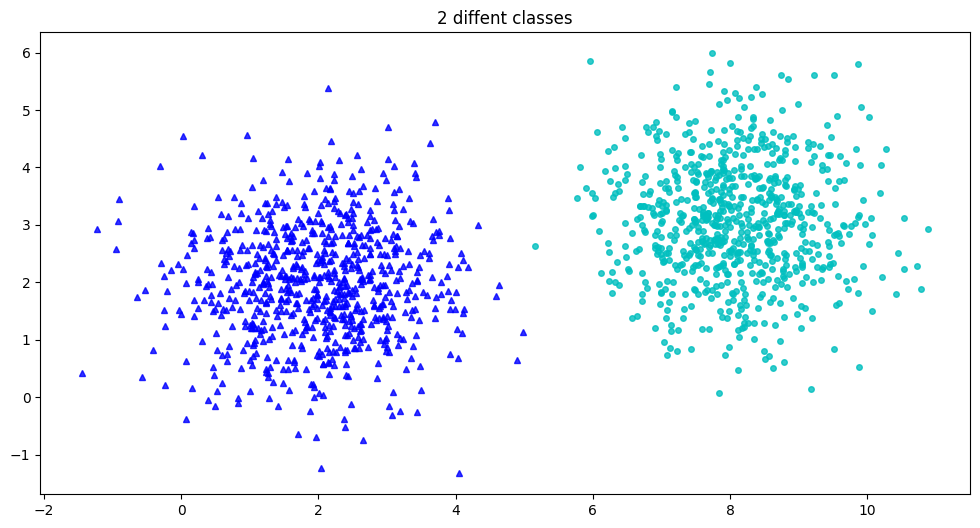

In [ ]:
C = 2# number of classes
N = 1000  # number of points per class
means = [[2, 2], [8, 3]]
cov = [[1, 0], [0, 1]]

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

X = np.concatenate((X0, X1), axis = 0) # each row is a datapoint
y = np.asarray([0]*N + [1]*N)

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

def display(X, label):
    X0 = X[np.where(label == 0)[0]]
    X1 = X[np.where(label == 1)[0]]
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'co', markersize = 4, alpha = .8)
    plt.plot()

display(X_train,y_train)
plt.title("2 diffent classes")
plt.show()

### 2.1 Logistic model

Objective of Logistic Regression: to minimize cross-entropy error
$$f(w) = - \sum_{i=1}^n\{y_i\log \sigma(x_iw) + (1-y_i)\log [1- \sigma(x_iw)]\}$$

where, $\sigma(z) = \frac{1}{1 + e^{-z}}$

Gradient of $f(w)$:
$$\nabla f(w) = \sum_{i=1}^n \{\sigma(x_iw) -y_i\}x_i$$

The cross-entropy error function quantifies the difference between two probability distributions: the actual labels and the predictions. The terms inside the summation measure the error for each individual prediction:

- $y_i \log \sigma(x_i w)$: This term becomes significant when $y_i = 1$. It measures the error when the actual class is 1 and penalizes the model more as the predicted probability diverges from 1.
- $(1 - y_i) \log [1 - \sigma(x_i w)]$: This term is crucial when $y_i = 0$. It penalizes the model when the prediction is far from 0.

Minimizing this function means finding a model that predicts probabilities as close as possible to the actual class labels, reducing the overall prediction error.

###  2.2 Gradient descent for logistic regression

In [ ]:
def sigmoid(S):
    """
    S: an numpy array
    return sigmoid function of each element of S
    """
    return 1/(1 + np.exp(-S))

def prob(w, X):
    """
    X: a 2d numpy array of shape (N, d). N datatpoint, each with size d
    w: a 1d numpy array of shape (d)
    """
    return sigmoid(X.dot(w))

def loss(w, X, y, lam):
    """
    X, w as in prob
    y: a 1d numpy array of shape (N). Each elem = 0 or 1
    """
    z = prob(w, X)
    return -np.mean(y*np.log(z) + (1-y)*np.log(1-z)) + 0.5*lam/X.shape[0]*np.sum(w*w)

def logistic_regression(w_init, X, y, lam = 0.001, lr = 0.1, nepoches = 2000):
    # lam - reg paramether, lr - learning rate, nepoches - number of epoches
    N, d = X.shape[0], X.shape[1]
    w = w_old = w_init
    loss_hist = [loss(w_init, X, y, lam)] # store history of loss in loss_hist
    ep = 0
    while ep < nepoches:
        ep += 1
        mix_ids = np.random.permutation(N)
        for i in mix_ids:
            xi = X[i]
            yi = y[i]
            zi = sigmoid(xi.dot(w))
            w = w - lr*((zi - yi)*xi + lam*w)
        loss_val = loss(w, X, y, lam)
        loss_hist.append(loss_val)
        if np.linalg.norm(w - w_old)/d < 1e-6:
            break
        w_old = w
    return w, loss_hist

def predict(w, X, threshold = 0.5):
    """
    predict output of each row of X
    X: a numpy array of shape (N, d)
    threshold: a threshold between 0 and 1
    return a 1d numpy array, each element is 0 or 1
    """
    res = np.zeros(X.shape[0])
    res[np.where(prob(w, X) > threshold)[0]] = 1
    return res

In [ ]:
def plot_logistic(w):
    xm = np.arange(-2, 12, 0.025)
    xlen = len(xm)
    ym = np.arange(-2, 7, 0.025)
    ylen = len(ym)
    xx, yy = np.meshgrid(xm, ym)
    xx1 = xx.ravel().reshape(-1, 1)
    yy1 = yy.ravel().reshape(-1, 1)
    XX = np.concatenate(( xx1, yy1, np.ones(( xx.size, 1))), axis = 1)
    Z = predict(w, XX)
    Z = Z.reshape(xx.shape)
    CS = plt.contourf(xx, yy, Z, 100, alpha = .1)
    plt.title("Final patten for each class")
    display(X, y)
    plt.show()

[  2.4568078    0.10482069 -12.97543523]
Accuracy 100.00 %


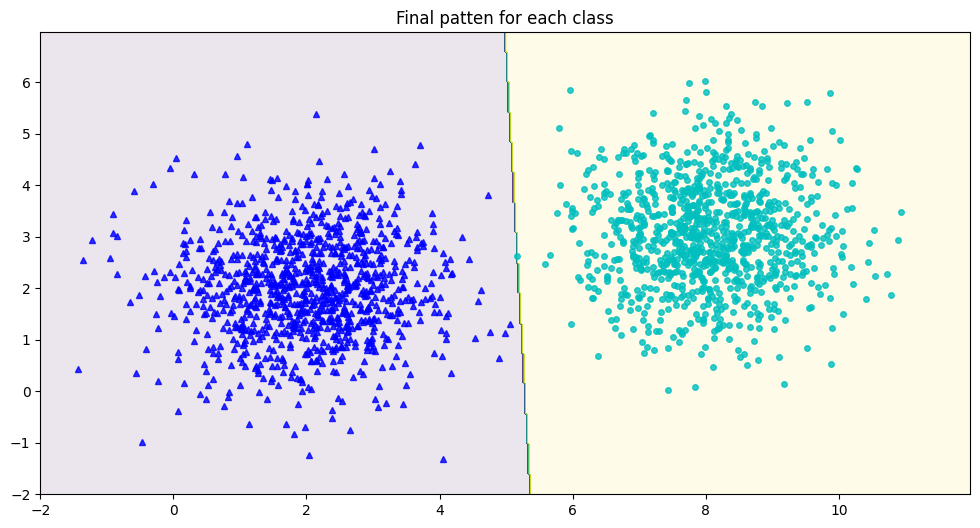

In [ ]:
# bias trick
Xbar_train = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis = 1)
Xbar_test = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis = 1)

# randomly initial weight parameters
w_init = np.random.randn(Xbar_train.shape[1])

# training model
w, loss_hist = logistic_regression(w_init, Xbar_train, y_train, lam = 0.0001, lr = 0.05, nepoches = 1000)
y_predict = predict(w, Xbar_test)

print(w)
print("Accuracy %.2f %%" % (100*accuracy_score(y_test, y_predict)))
plot_logistic(w)

### 2.3 Compare with model from sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Accuracy on trainig set:", logreg.score(X_train, y_train)*100)
print("Accuracy on test set:", logreg.score(X_test, y_test)*100)

Accuracy on trainig set: 100.0
Accuracy on test set: 100.0
